# Data description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Independent variables: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Dependent variables: Number of predicted wins (W)



# Importing required libraries

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [174]:
df=pd.read_csv('baseball.csv')

In [175]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [176]:
df.shape

(30, 17)

we have 30 rows and 17 columns

In [177]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

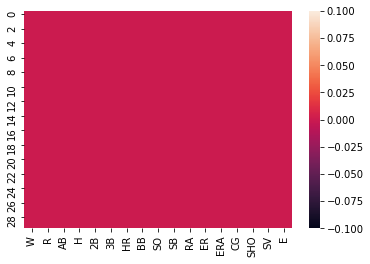

In [178]:
sns.heatmap(df.isnull())
plt.show()

There is no missing value

In [179]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [180]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Checking Outliers and Data distribution

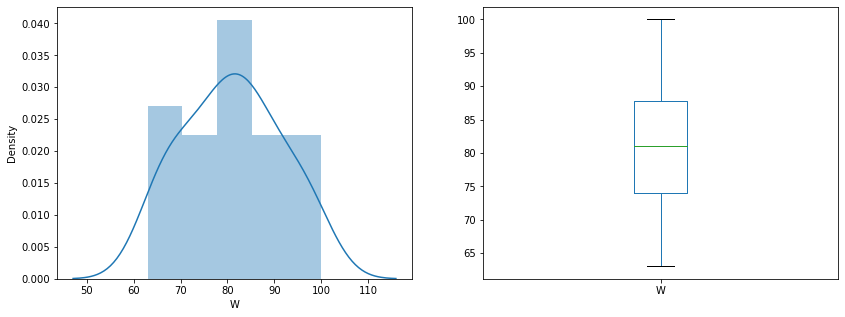

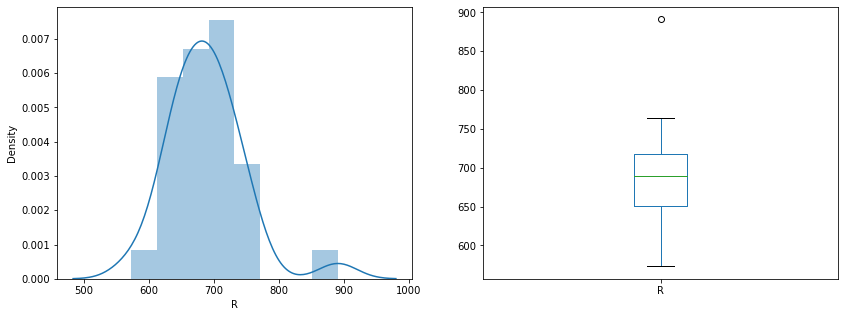

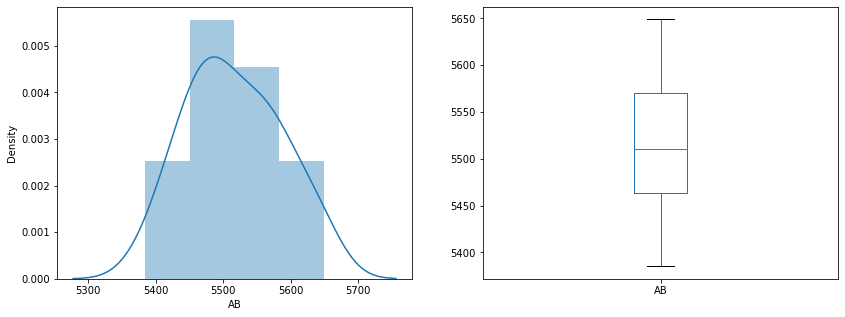

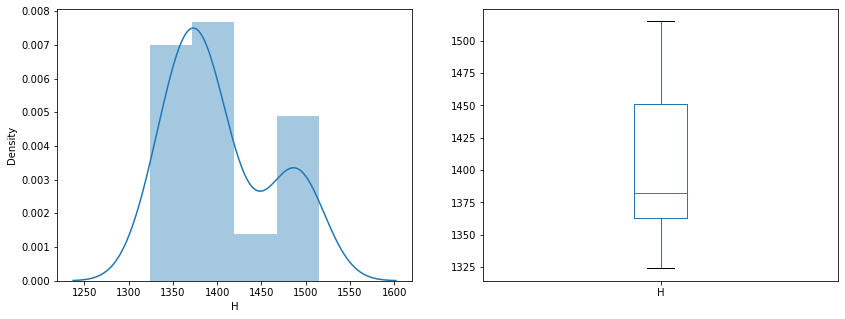

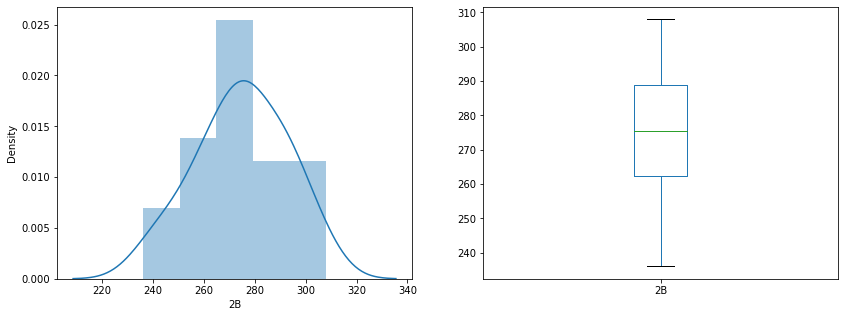

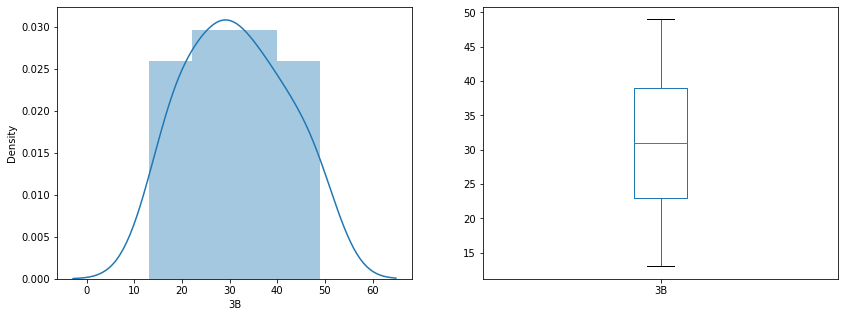

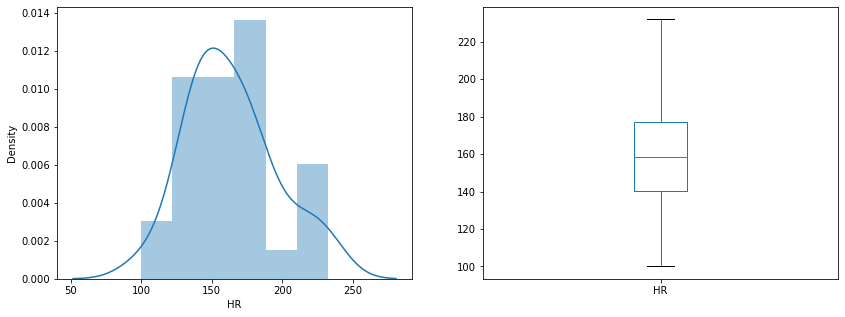

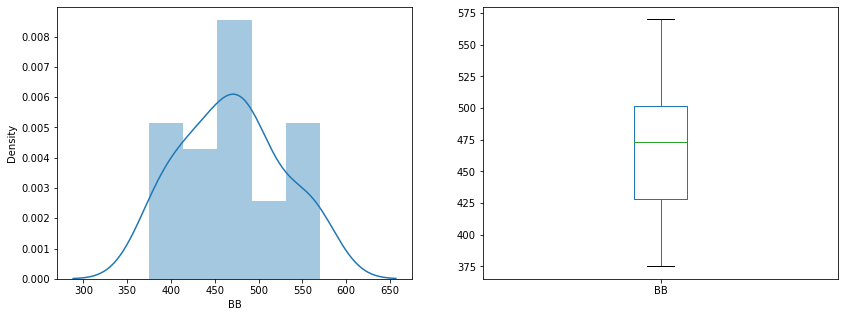

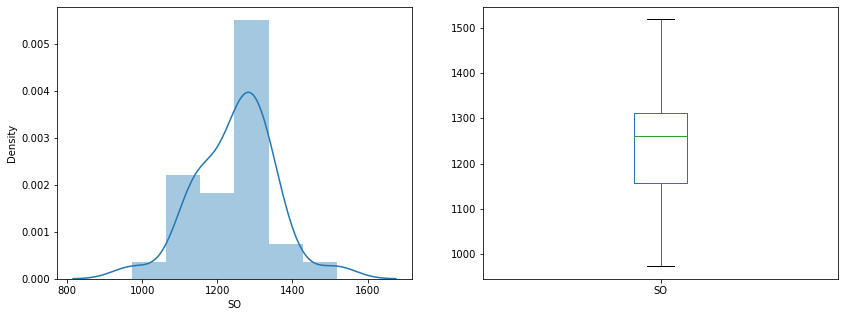

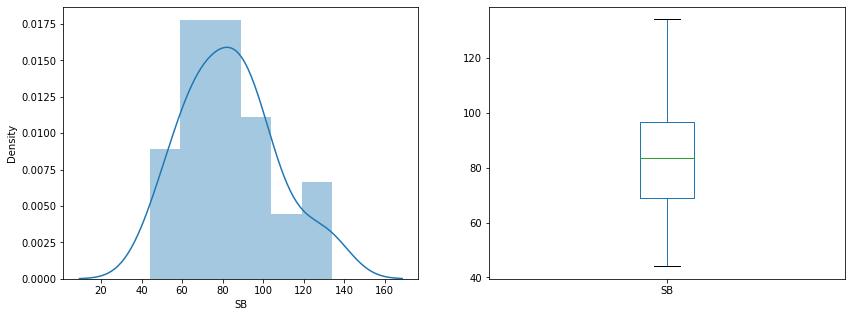

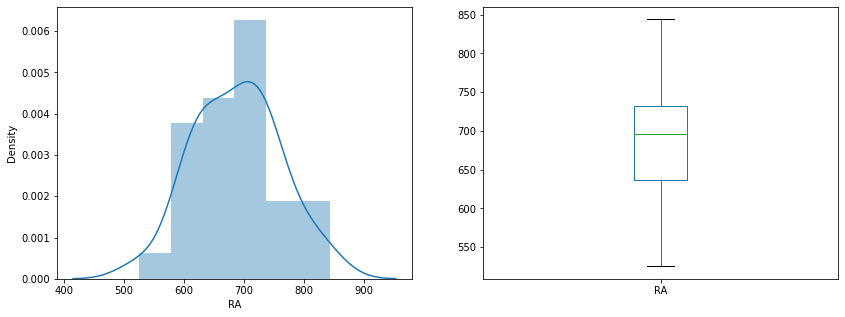

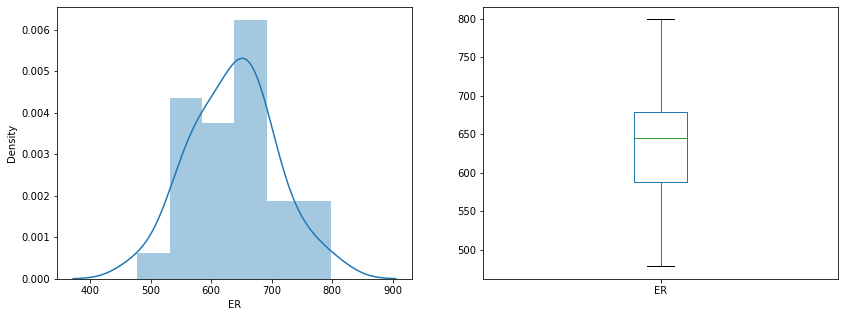

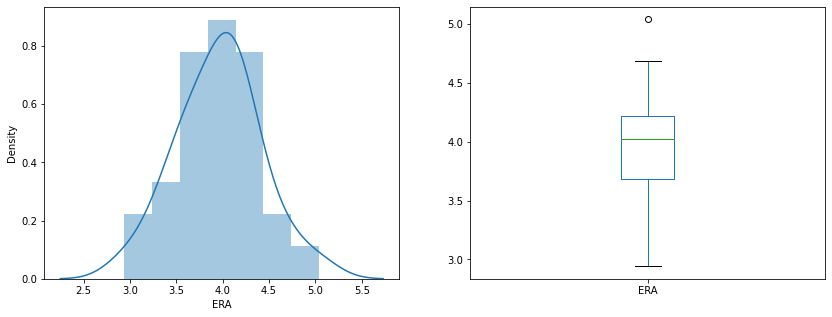

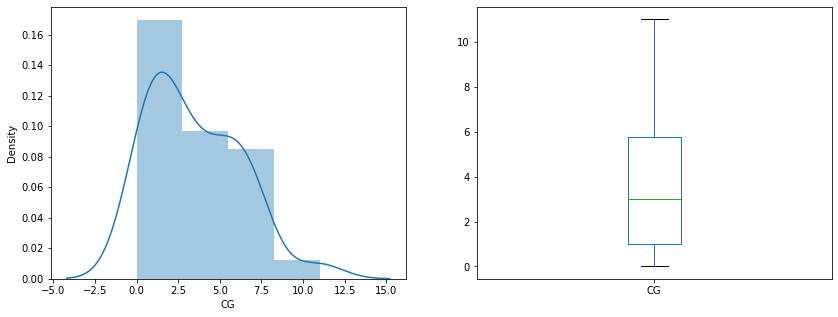

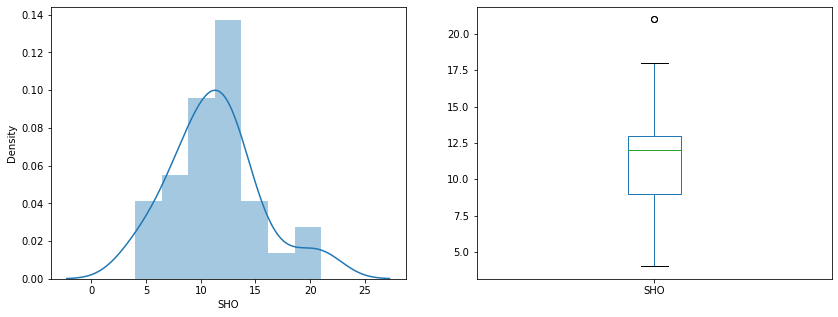

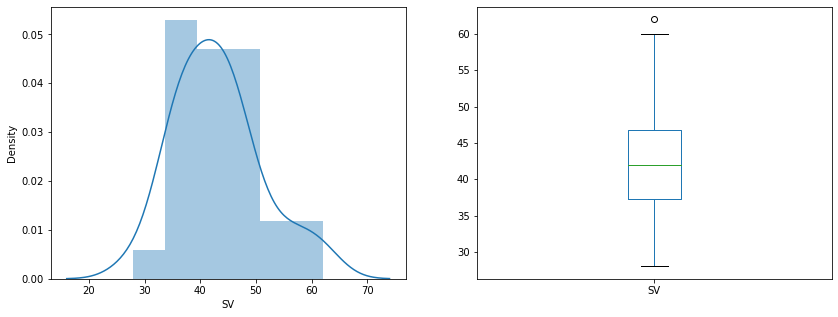

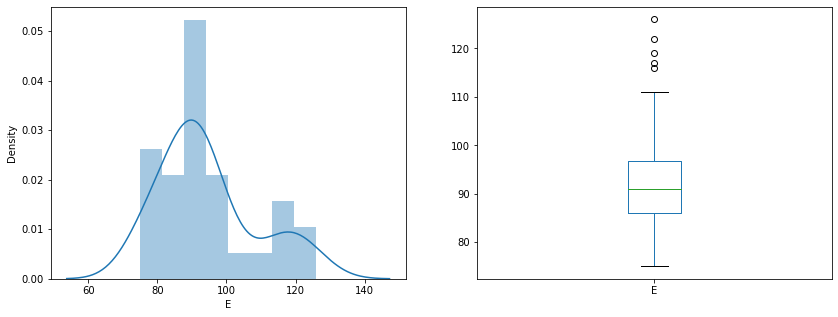

<Figure size 1008x360 with 0 Axes>

In [181]:
for i in range(0,len(df.columns)):
    plt.subplot(121)
    sns.distplot(df[df.columns[i]])
    plt.subplot(122)
    df[df.columns[i]].plot.box(figsize=(14,5))
    plt.figure(figsize=(14,5))
    
plt.show()

Observation:

- ERA, SHO,SV and E has got outliers.
- Some column seems to have skewness, however, we will check it separately.

In [182]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

we need to remove skewness from R,H,HR,SB,CG,SHO,SV and E

# Checking the correlation

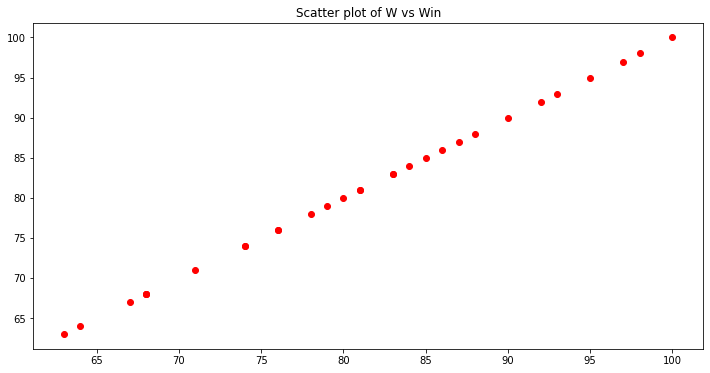

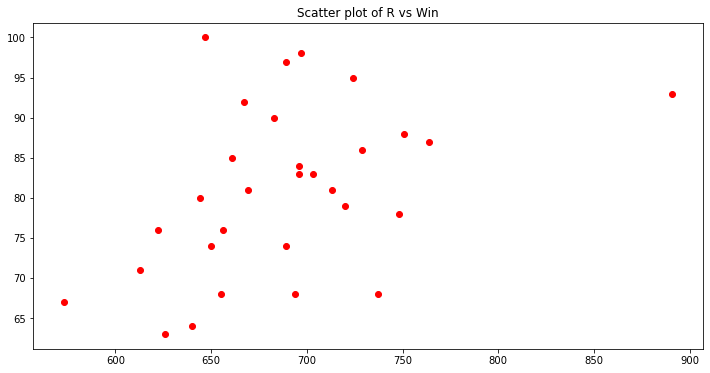

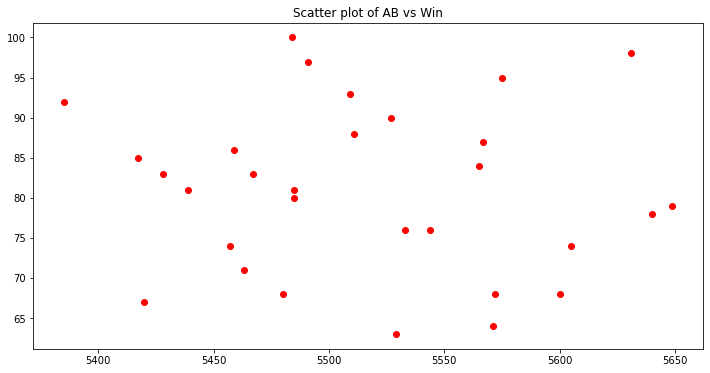

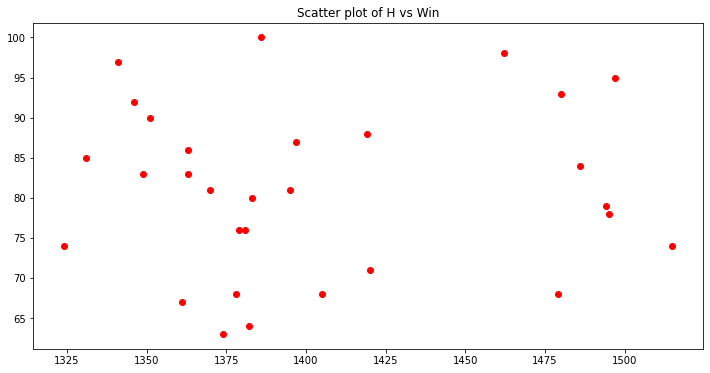

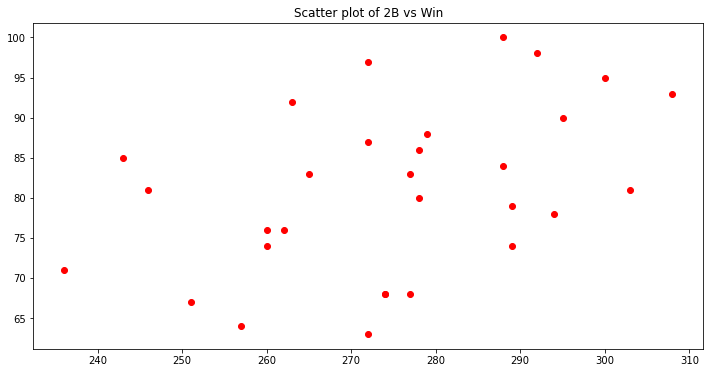

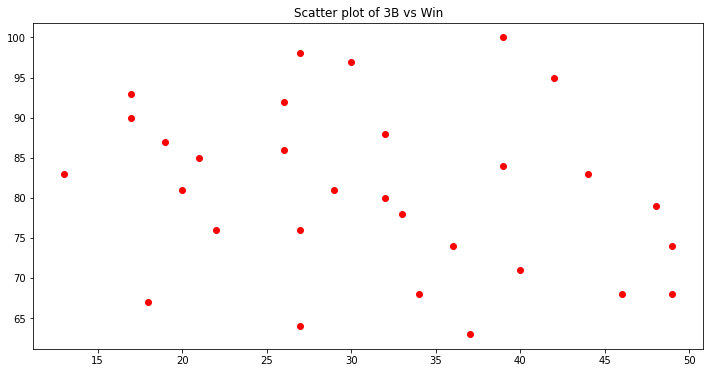

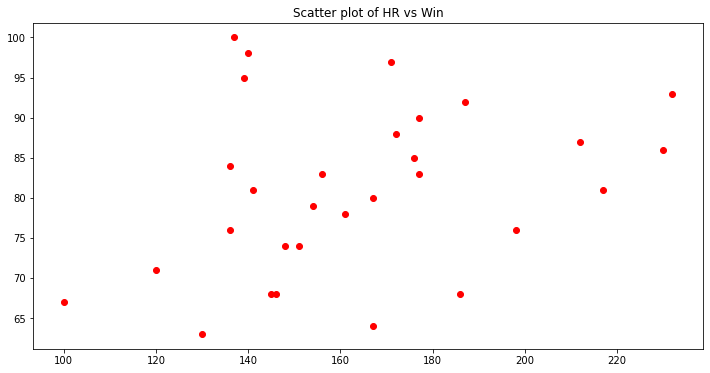

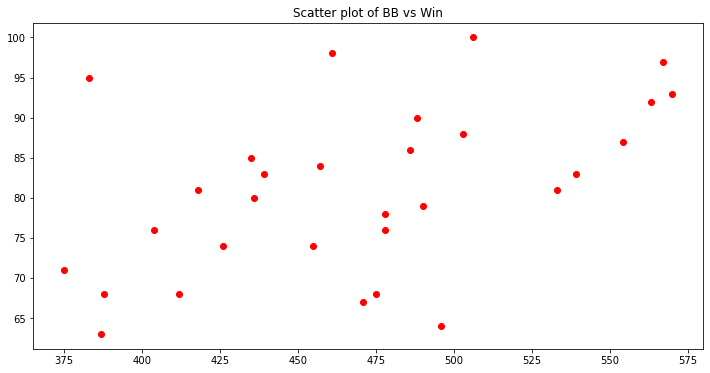

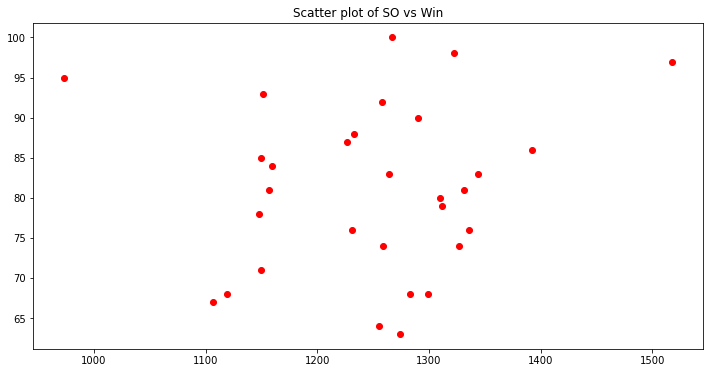

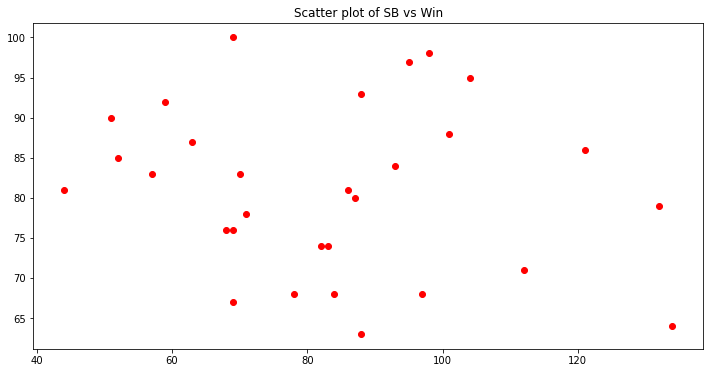

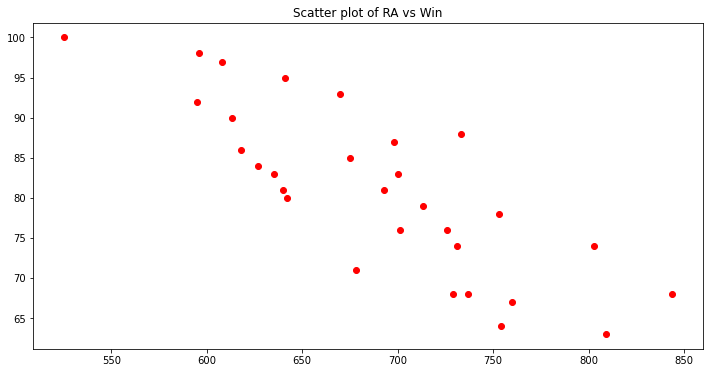

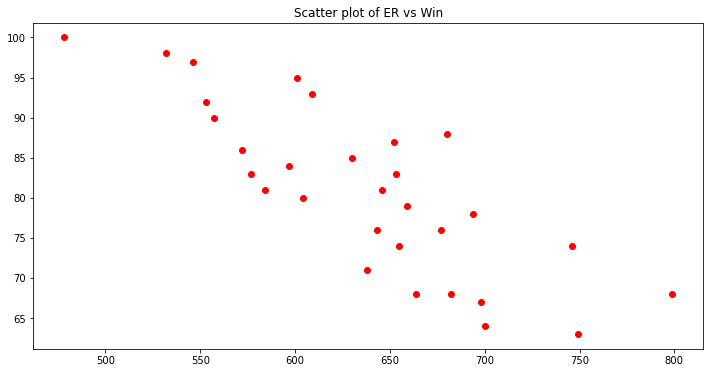

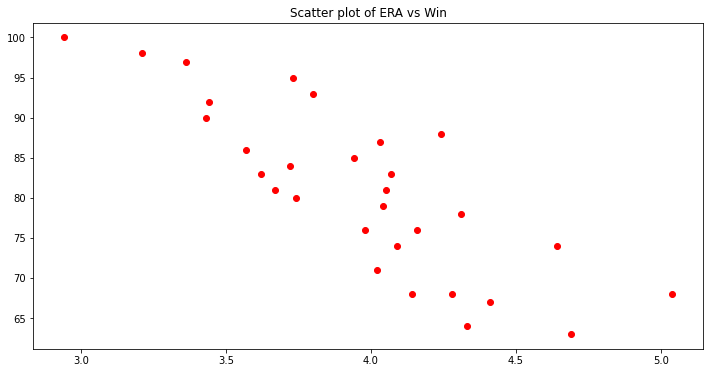

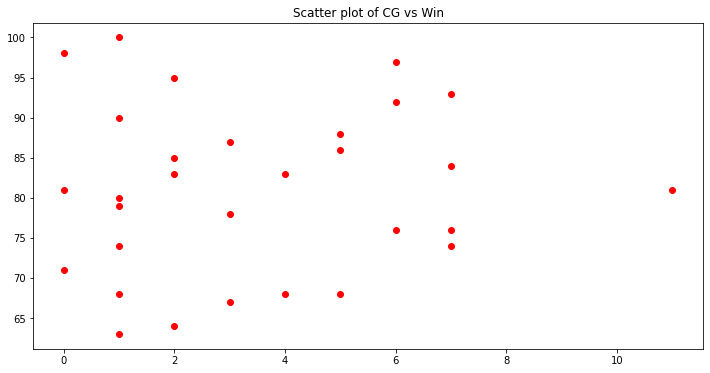

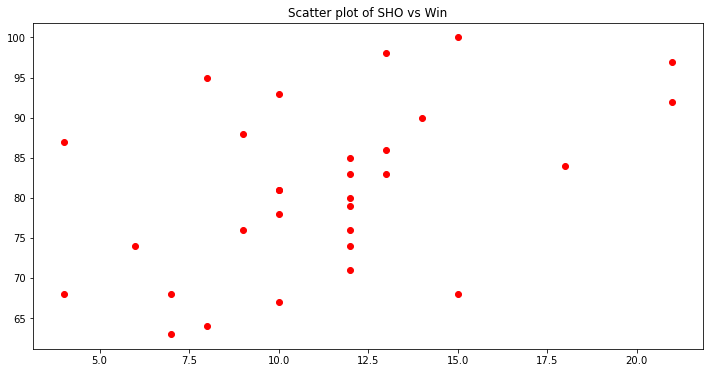

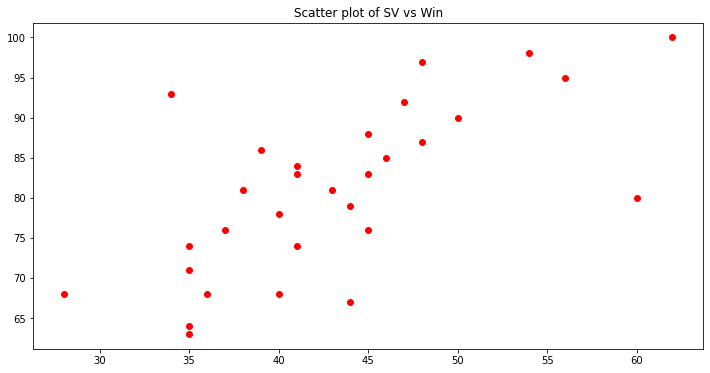

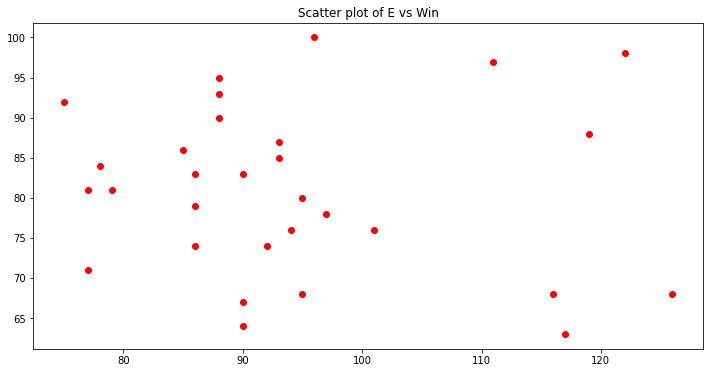

In [183]:
for i in df.columns:
    plt.figure(figsize=[12,6])
    plt.scatter(x = df[i] ,y = df['W'] , color = 'r')
    plt.title('Scatter plot of {} vs Win'.format(i))
    plt.show()

Some relation can be seen between SV,ERA,ER,RA vs W

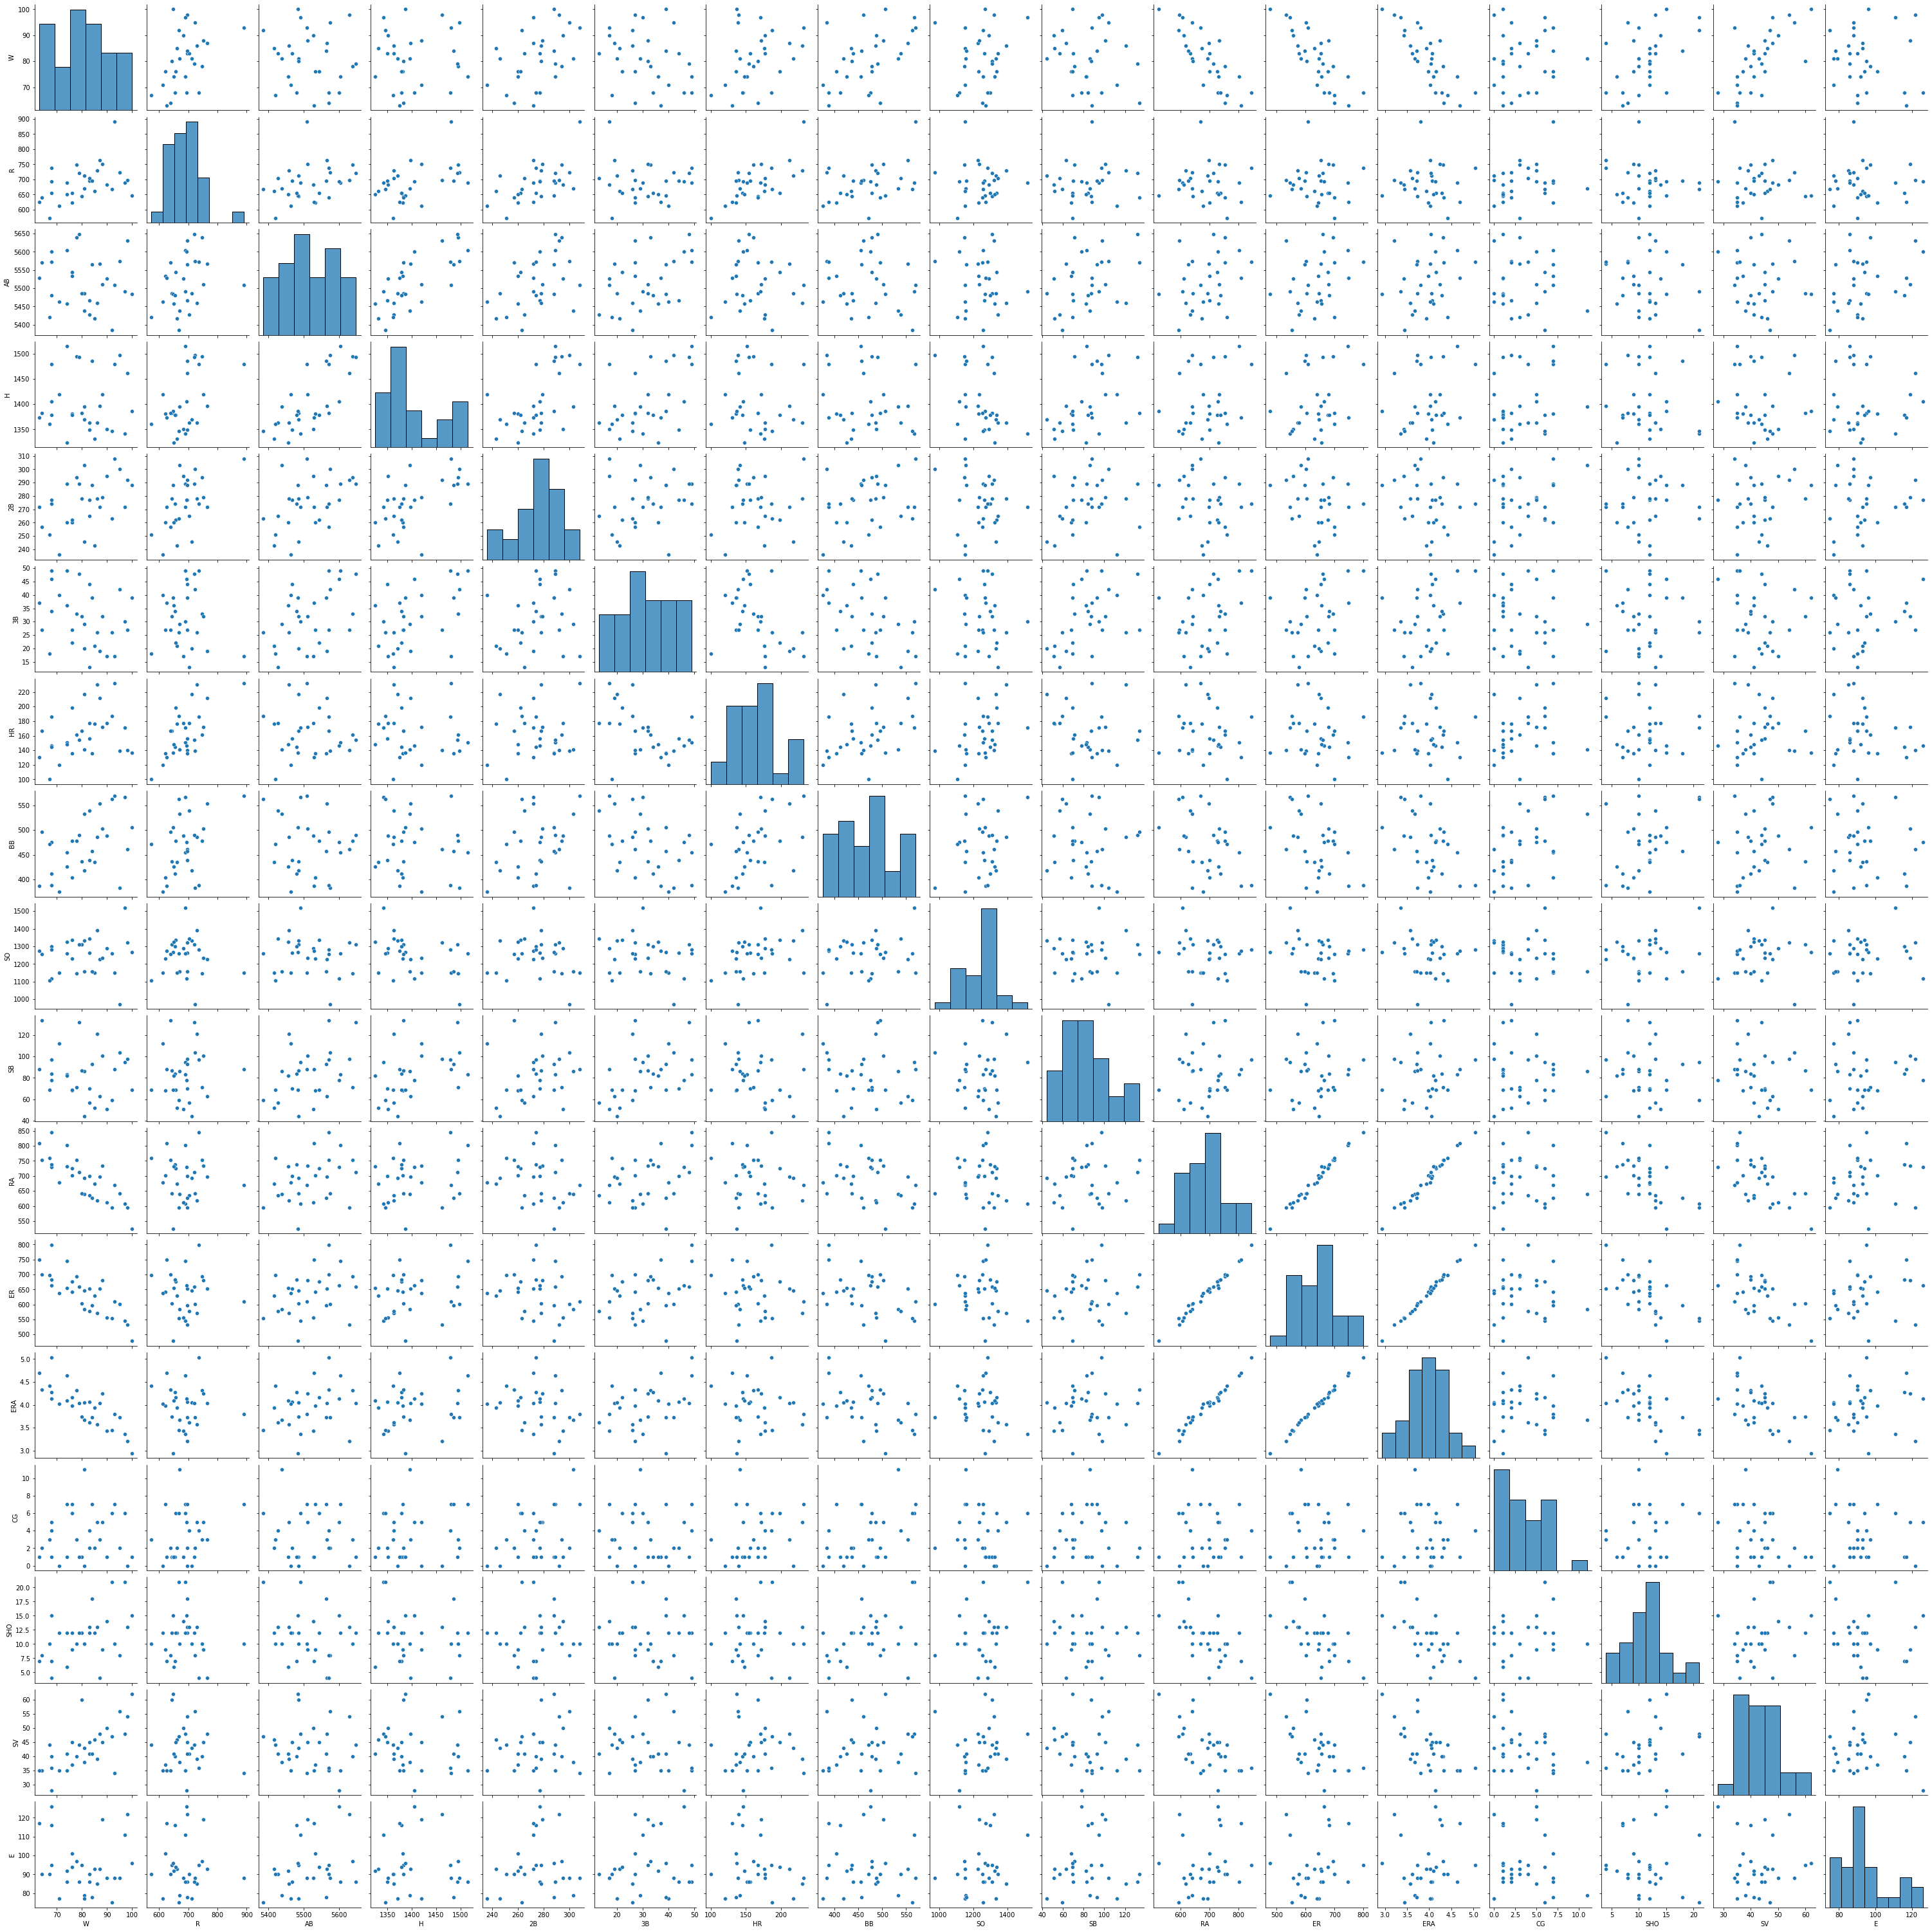

In [184]:
sns.pairplot(df)
plt.show()

As there are too many columns, we are not able to analyse anything from this pairplot

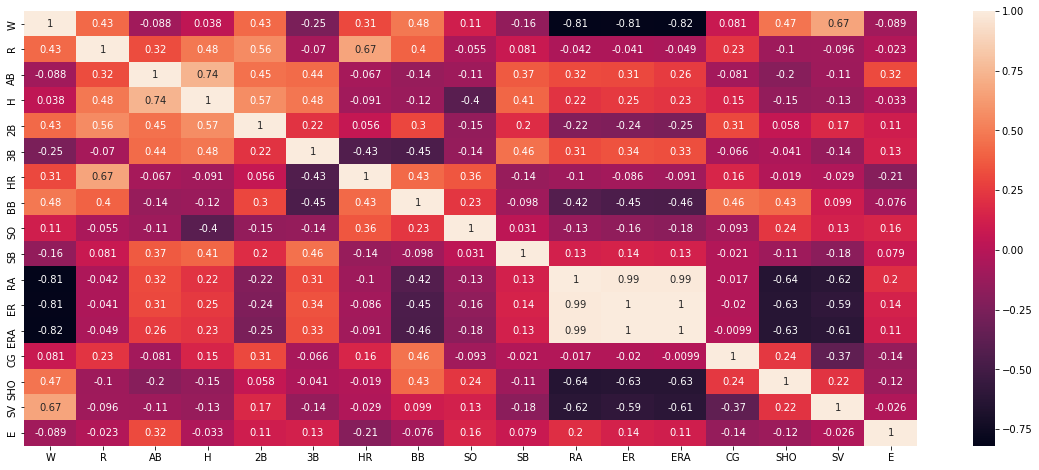

In [185]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations
- W is positively correlated to SV, SHO, BB, HR, 2B, R and negatively correlated to ER, RA and ERA.
- R is positively correlated to CG,BB,HR, 2B,H,AB,W
- AB is positively correlated to E,ER,ERA,RA,SB,3B,2B,H,R
- H is positively correlated to CG,E,ER,ERA,RA,SB,3B,2B,AB and R,while negatively correlated to SO
- 2B is positively correlated to CG,SB,BB,3B,H,AB,R,W
- 3B is positively correlated to E,ER,ERA,RA,SB,2B,H,AB while negatively correlated to BB and HR
- HR is positively correlated to SO,BB,R and W, while negatively correlated to 3B
- BB is positively correlated to SHO,CG,HR,2B,R,W and negatively correlated to ERA,ER,RA
- SO is positively correlated to SHO,CG,SO,HR and negatively correlated to H
- SB is positively correlated to 3B,H,AB
- RA, ERA and ER are highly correlated to each other,hence we can drop any of these columns on the basis of multicollinearity,however, dropping the column will be our last option.
- RA,ERA and ER are negatively correlated to SV,SHO and W.
- RA,ER and ERA are correlated to 3B,H and AB
- CG is positively correlated to BB,2B
- SHO and SV are negatively correlated to ERA,ER,RA and positively correlated to W
- E is positively correlated to AB

# Checking the correlation with target variable

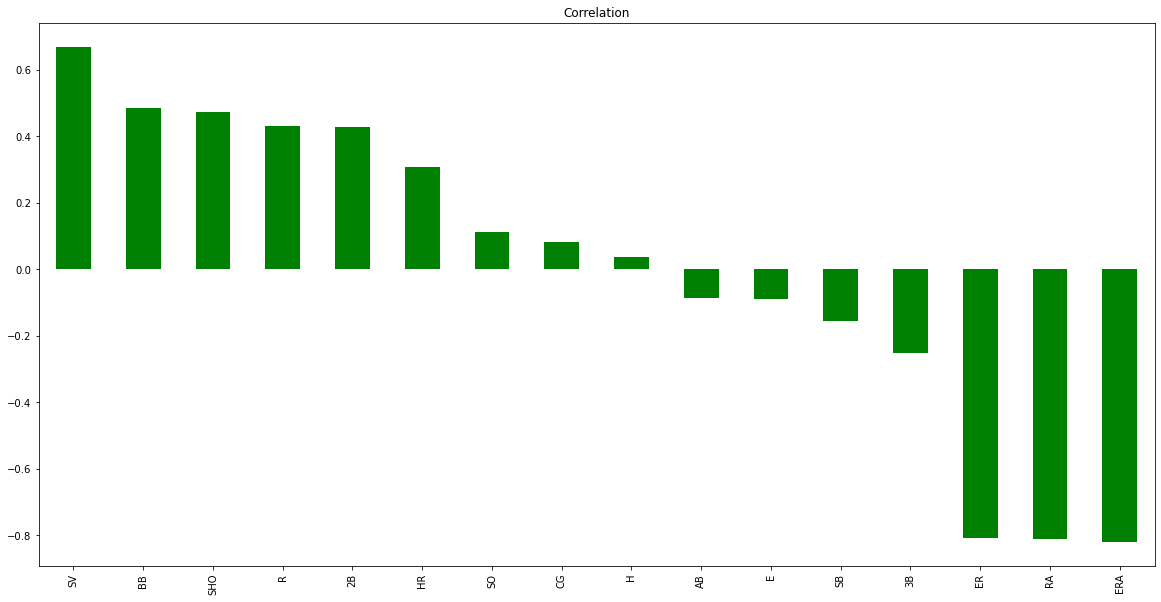

In [186]:
plt.figure(figsize=[20,10])
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color = 'g')
plt.title('Correlation')
plt.show()

- SV, BB,SHO,R,2B,HR,SO,CG and H are positively correlated to W
- ER,RA, ERA,3B,SB,E and AB are negatively correlated to W

# Removing the outliers

In [187]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print('Shape before removing the outliers:',df.shape)
print('Shape after removing the outliers:',df_new.shape)

Shape before removing the outliers: (30, 17)
Shape after removing the outliers: (29, 17)


Data loss is 3%, hence we can remove the outliers

In [188]:
df=df_new

# Splitting the data set

In [189]:
x = df.drop('W',axis=1)

In [190]:
y=df['W']

In [191]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


# Removing the highly correlated Variables

In [192]:
df_c=x.corr()
dc=set()
for i in range(len(df_c.columns)):
    for j in range(i):
        if abs(df_c.iloc[i,j])>0.90:
            cname = df_c.columns[i]
            dc.add(cname)

In [193]:
dc

{'ER', 'ERA'}

In [194]:
x=x.drop(dc,axis=1)

In [195]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


In [196]:
from sklearn.preprocessing import power_transform

In [197]:
df_x=power_transform(x)

In [198]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [199]:
df_x.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Skewness has been removed

In [200]:
x=df_x

# Scaling the data

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
sc=StandardScaler()
df_n=sc.fit_transform(x)

In [203]:
df_n=pd.DataFrame(df_n,columns=x.columns)
df_n

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.121871,-2.064039,0.677176,0.082858
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.870682,0.236737,1.908137,0.237592
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.770649,-0.513555,0.312020,1.554265


In [204]:
x=df_n

# Finding the best random state

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [206]:
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2score=r2_score(y_test,pred)
    if r2score>maxr2:
        maxr2=r2score
        maxrs=i
print('Best accuracy is',maxr2,'for random state',i)

Best accuracy is 0.9740504238458543 for random state 199


In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=199)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2 score of',lr,': ',r2_score(y_test,pred))
score=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of',lr,': ', abs(score.mean()))
print('Difference between R2 score and cross validation score is',r2_score(y_test,pred)-abs(score.mean()))

R2 score of LinearRegression() :  0.711867908383863
Cross validation score of LinearRegression() :  0.35913914739125247
Difference between R2 score and cross validation score is 0.3527287609926106


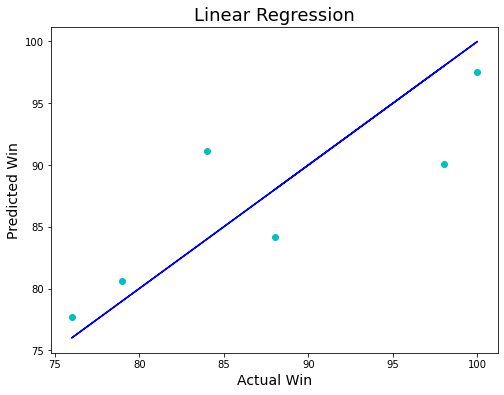

In [208]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Win', fontsize=14)
plt.ylabel('Predicted Win', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# Regularization

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.00001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [211]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7634824818811532

In [212]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4671269025287129

In [213]:
print('Difference between R2 score and cross validation score is',r2_score(y_test,pred_ls)-abs(cv_score.mean()))

Difference between R2 score and cross validation score is 0.2963555793524403


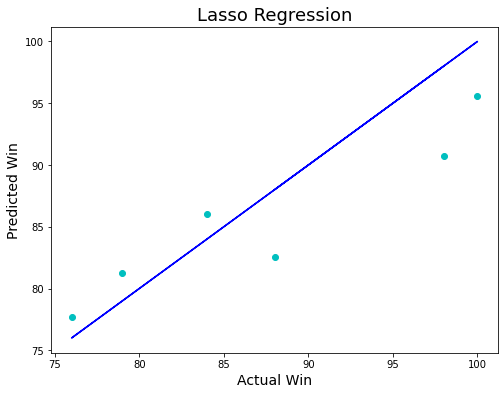

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred_ls,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Win', fontsize=14)
plt.ylabel('Predicted Win', fontsize=14)
plt.title('Lasso Regression', fontsize=18)
plt.show()

# Ensemble technique

In [215]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(r2_score(y_test,rfpred))

rfcvscore=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score for Random Forest regressor is',abs(rfcvscore.mean()))
print('Difference between R2 score and cross validation score is',r2_score(y_test,rfpred)-abs(rfcvscore.mean()))

0.22259234746639123
Cross Validation score for Random Forest regressor is 0.4856345156340218
Difference between R2 score and cross validation score is -0.2630421681676306


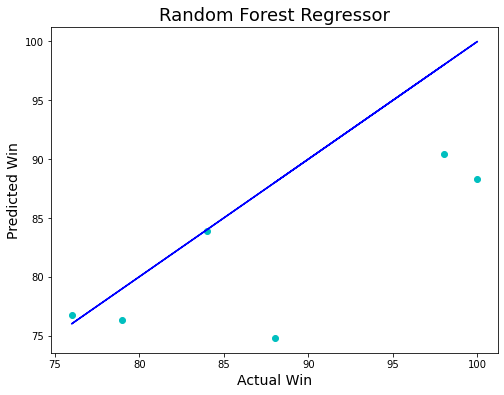

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=rfpred,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Win', fontsize=14)
plt.ylabel('Predicted Win', fontsize=14)
plt.title('Random Forest Regressor', fontsize=18)
plt.show()

# Saving the model

In [170]:
import pickle
filename='churn.pkl'
pickle.dump(ls,open(filename,'wb'))

In [171]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7634824818811532


In [172]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_ls[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5
Predicted,90.752617,77.728631,81.221654,85.999863,95.545614,82.516685
Original,90.752617,77.728631,81.221654,85.999863,95.545614,82.516685
